In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import os

In [2]:
dataset=pd.read_csv("egypt_cities_weather_full_3.csv")
df=dataset.copy()
df.head()

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,...,windgusts_10m_max,relative_humidity_2m_max,relative_humidity_2m_min,relative_humidity_2m_mean,shortwave_radiation_sum,sunshine_duration,et0_fao_evapotranspiration,city,latitude,longitude
0,2020-01-01,18.5,10.4,14.0,16.4,9.9,12.5,0.0,0.0,0.0,...,20.2,92,40,66,10.57,25214.31,2.07,Cairo,30.06263,31.24967
1,2020-01-02,17.1,7.7,12.5,11.9,4.2,9.1,0.0,0.0,0.0,...,39.6,76,33,51,12.42,32523.04,2.80,Cairo,30.06263,31.24967
2,2020-01-03,16.0,7.4,11.8,9.5,4.0,7.2,0.0,0.0,0.0,...,49.0,90,28,58,13.01,33823.71,3.13,Cairo,30.06263,31.24967
3,2020-01-04,16.7,9.5,12.6,12.8,6.4,8.9,0.1,0.1,0.0,...,39.6,85,44,61,8.91,33350.60,2.49,Cairo,30.06263,31.24967
4,2020-01-05,17.4,7.0,12.1,13.0,3.0,8.1,0.0,0.0,0.0,...,37.1,72,37,54,13.04,33899.49,3.04,Cairo,30.06263,31.24967


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12606 entries, 0 to 12605
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        12606 non-null  object 
 1   temperature_2m_max          12606 non-null  float64
 2   temperature_2m_min          12606 non-null  float64
 3   temperature_2m_mean         12606 non-null  float64
 4   apparent_temperature_max    12606 non-null  float64
 5   apparent_temperature_min    12606 non-null  float64
 6   apparent_temperature_mean   12606 non-null  float64
 7   precipitation_sum           12606 non-null  float64
 8   rain_sum                    12606 non-null  float64
 9   snowfall_sum                12606 non-null  float64
 10  windspeed_10m_max           12606 non-null  float64
 11  windspeed_10m_mean          12606 non-null  float64
 12  windgusts_10m_max           12606 non-null  float64
 13  relative_humidity_2m_max    126

In [4]:
df.describe()

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,windspeed_10m_mean,windgusts_10m_max,relative_humidity_2m_max,relative_humidity_2m_min,relative_humidity_2m_mean,shortwave_radiation_sum,sunshine_duration,et0_fao_evapotranspiration,latitude,longitude
count,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.00000,12606.000000,12606.000000,12606.0,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000,12606.000000
mean,31.035554,19.851325,25.511304,29.622822,18.745193,24.03676,0.101420,0.101420,0.0,20.994288,13.362113,39.009559,64.268444,23.783278,42.017135,21.447922,39141.199290,6.492197,29.300567,32.913307
std,7.362082,6.549288,6.931450,8.550158,7.574105,7.89028,1.060565,1.060565,0.0,5.593993,5.063110,9.709994,20.401623,9.637746,13.627405,6.006802,5776.024138,2.546300,0.816516,1.669022
min,11.100000,3.700000,8.200000,5.700000,0.400000,4.00000,0.000000,0.000000,0.0,3.600000,1.800000,12.200000,12.000000,3.000000,9.000000,5.120000,0.000000,1.350000,27.915820,31.208610
25%,24.400000,14.400000,19.400000,22.100000,12.200000,17.00000,0.000000,0.000000,0.0,16.900000,9.600000,32.400000,47.000000,16.000000,32.000000,15.760000,35149.710000,4.290000,28.482080,31.249670
50%,32.000000,20.300000,26.200000,30.600000,19.200000,24.70000,0.000000,0.000000,0.0,21.050000,12.400000,38.200000,66.000000,23.000000,42.000000,22.495000,39701.195000,6.590000,29.666715,32.815395
75%,37.400000,24.800000,31.400000,37.300000,25.500000,31.20000,0.000000,0.000000,0.0,24.700000,16.300000,45.000000,82.000000,30.000000,51.000000,27.010000,43660.082500,8.370000,30.009440,34.495050
max,48.700000,39.200000,43.500000,48.500000,37.500000,42.30000,43.100000,43.100000,0.0,55.000000,35.400000,104.400000,100.000000,71.000000,84.000000,30.200000,47289.450000,16.060000,30.062630,34.895720


In [6]:
df.isna().sum()

time                          0
temperature_2m_max            0
temperature_2m_min            0
temperature_2m_mean           0
apparent_temperature_max      0
apparent_temperature_min      0
apparent_temperature_mean     0
precipitation_sum             0
rain_sum                      0
snowfall_sum                  0
windspeed_10m_max             0
windspeed_10m_mean            0
windgusts_10m_max             0
relative_humidity_2m_max      0
relative_humidity_2m_min      0
relative_humidity_2m_mean     0
shortwave_radiation_sum       0
sunshine_duration             0
et0_fao_evapotranspiration    0
city                          0
latitude                      0
longitude                     0
dtype: int64

In [37]:
def weather_label(row):
    temp_max = row['temperature_2m_max']
    temp_min = row['temperature_2m_min']
    humidity = row['relative_humidity_2m_mean']
    sunshine = row['sunshine_duration']
    precip = row['precipitation_sum']
    wind = row['windspeed_10m_max']

    if precip > 5 or (precip > 0 and humidity > 80):
        return "Rainy"
    if wind >= 40:
        return "Very Windy"
    if temp_max >= 35:
        return "Very Hot"
    if temp_min <= 10:
        return "Very Cold"
    if sunshine > 30000 and precip == 0 and temp_max >= 30:
        return "Sunny & Hot"
    if sunshine > 30000 and precip == 0 and temp_max <= 10:
        return "Sunny & cold"
    if sunshine > 30000 and precip == 0 and wind>=30:
        return "Sunny & Windy"
    if temp_max >= 30 and humidity >= 70:
        return "Humid & Hot"
    if sunshine > 30000 and precip == 0:
        return "Sunny"
    if sunshine < 10000 and precip == 0:
        return "Cloudy"
    return "Comfortable"


df["weather"] = df.apply(weather_label, axis=1)
df


,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,...,city,latitude,longitude,weather,day,month,year,day_of_week,city_encoded,weather_encoded
0,2020-01-01,18.5,10.4,14.0,16.4,9.9,12.5,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Comfortable,1,1,2020,2,0,1
1,2020-01-02,17.1,7.7,12.5,11.9,4.2,9.1,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,2,1,2020,3,0,7
2,2020-01-03,16.0,7.4,11.8,9.5,4.0,7.2,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,3,1,2020,4,0,7
3,2020-01-04,16.7,9.5,12.6,12.8,6.4,8.9,0.1,0.1,0.0,...,Cairo,30.06263,31.24967,Very Cold,4,1,2020,5,0,7
4,2020-01-05,17.4,7.0,12.1,13.0,3.0,8.1,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,5,1,2020,6,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,2025-09-27,36.8,24.4,30.4,35.7,25.1,29.4,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,27,9,2025,5,5,5
12602,2025-09-28,39.1,25.8,32.2,38.1,24.6,30.6,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,28,9,2025,6,5,5
12603,2025-09-29,36.5,23.7,29.8,35.7,26.0,30.5,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,29,9,2025,0,5,5
12604,2025-09-30,35.1,22.7,28.9,33.0,23.2,28.1,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,30,9,2025,1,5,5


In [38]:
df.dtypes

time                          datetime64[ns]
temperature_2m_max                   float64
temperature_2m_min                   float64
temperature_2m_mean                  float64
apparent_temperature_max             float64
apparent_temperature_min             float64
apparent_temperature_mean            float64
precipitation_sum                    float64
rain_sum                             float64
snowfall_sum                         float64
windspeed_10m_max                    float64
windspeed_10m_mean                   float64
windgusts_10m_max                    float64
relative_humidity_2m_max               int64
relative_humidity_2m_min               int64
relative_humidity_2m_mean              int64
shortwave_radiation_sum              float64
sunshine_duration                    float64
et0_fao_evapotranspiration           float64
city                                  object
latitude                             float64
longitude                            float64
weather   

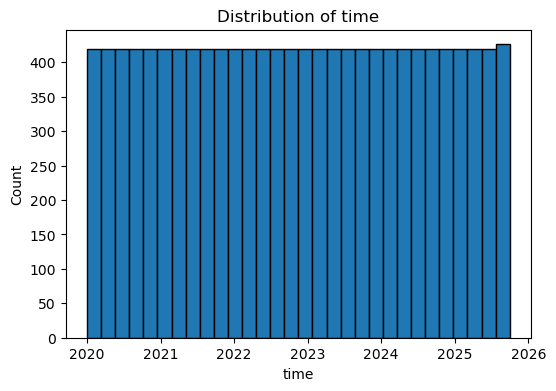

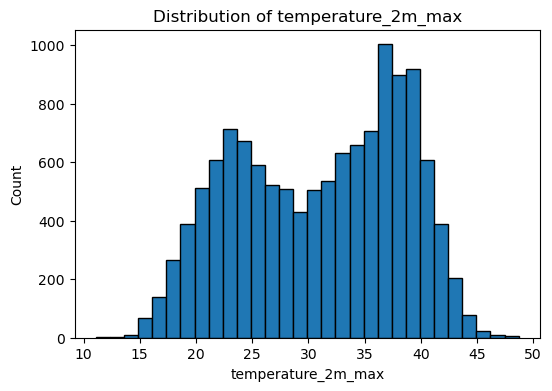

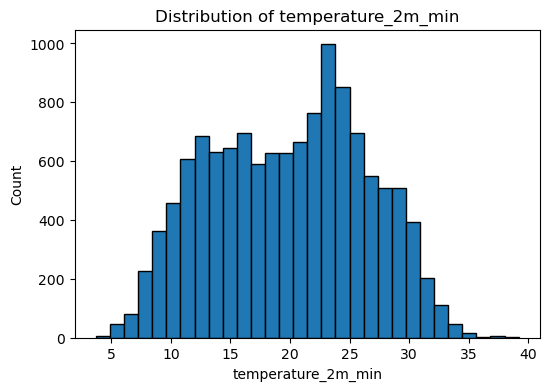

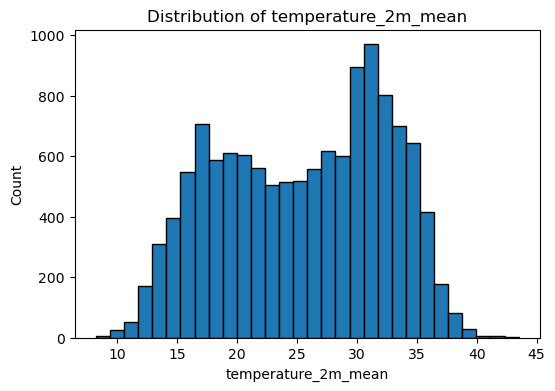

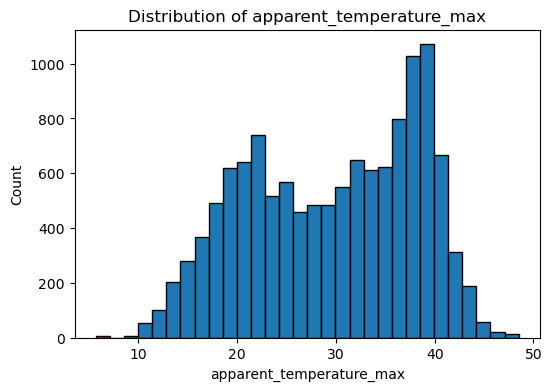

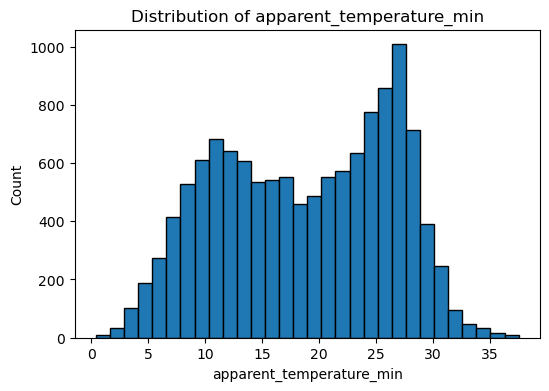

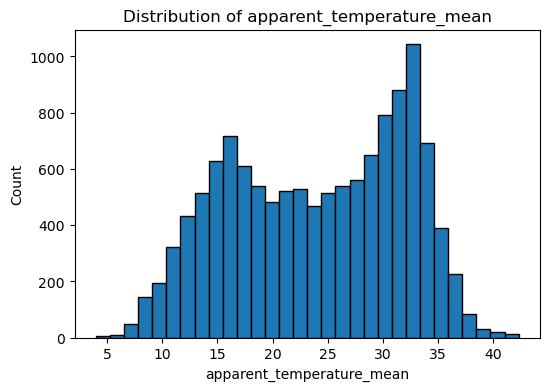

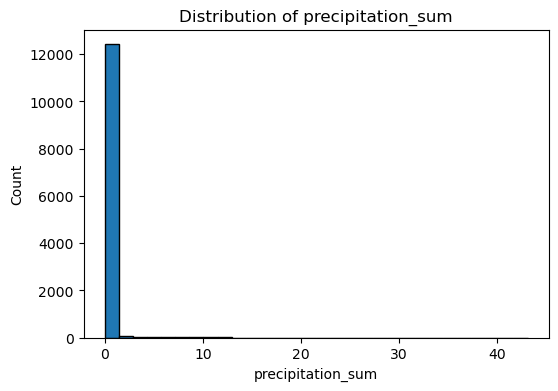

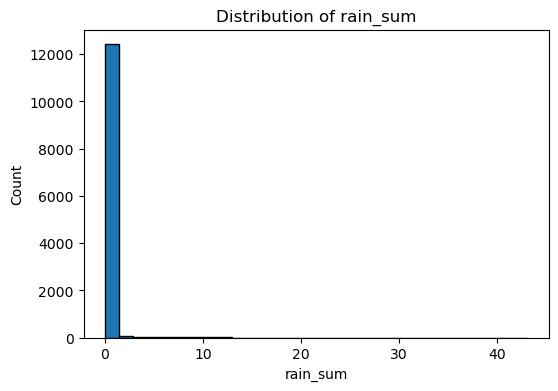

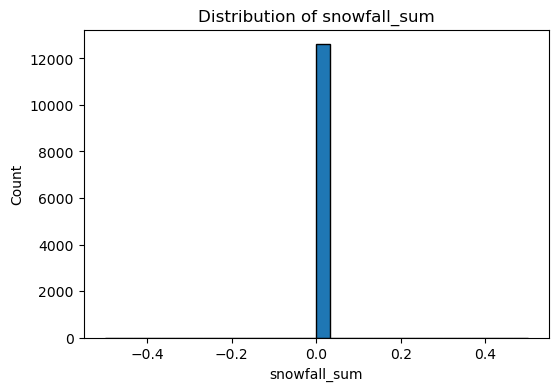

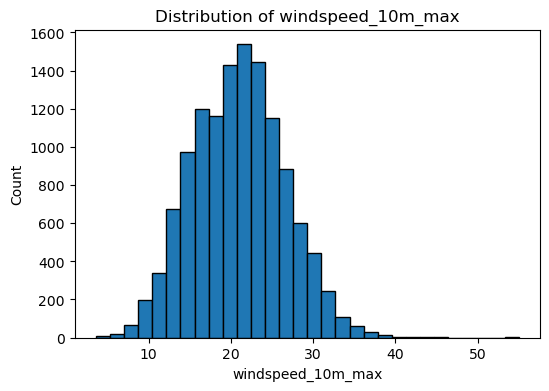

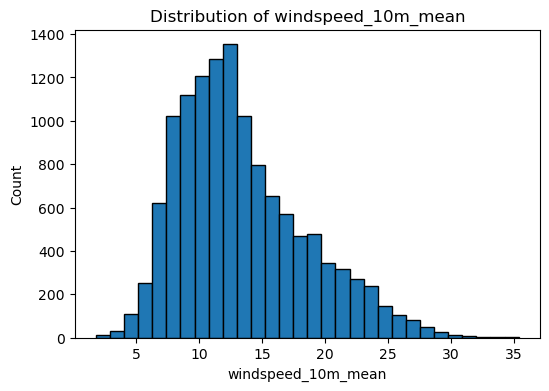

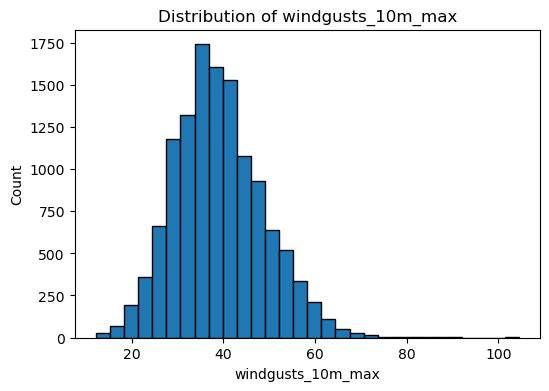

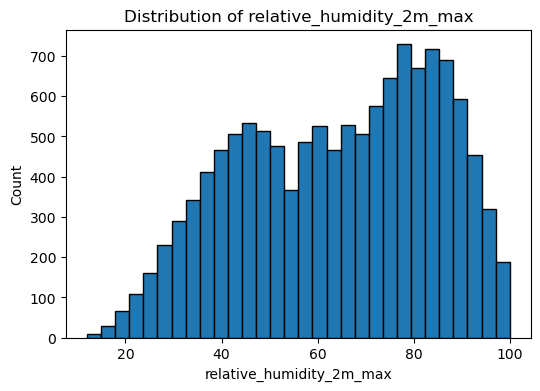

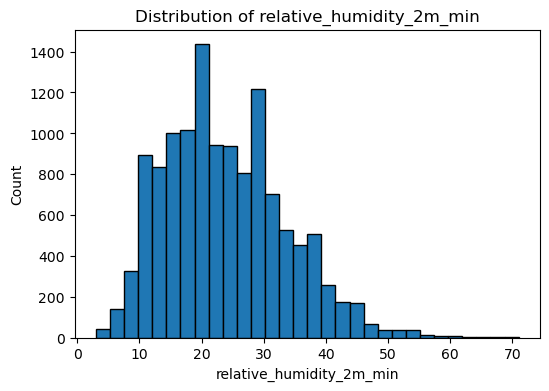

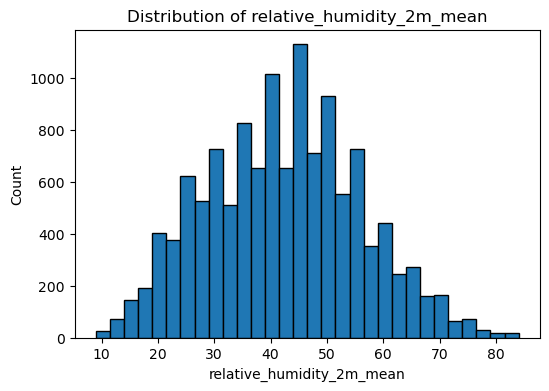

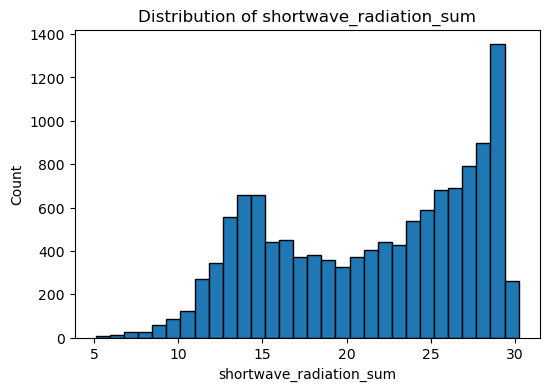

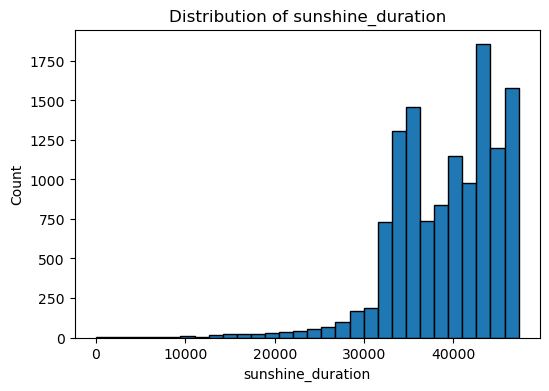

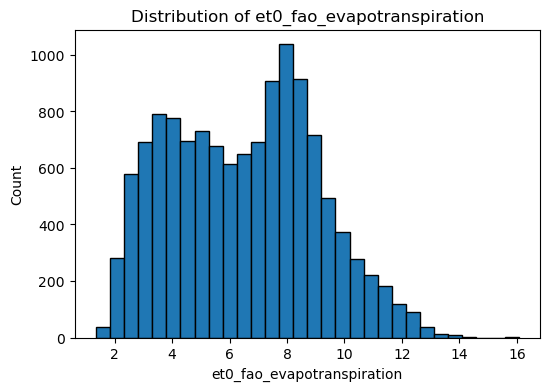

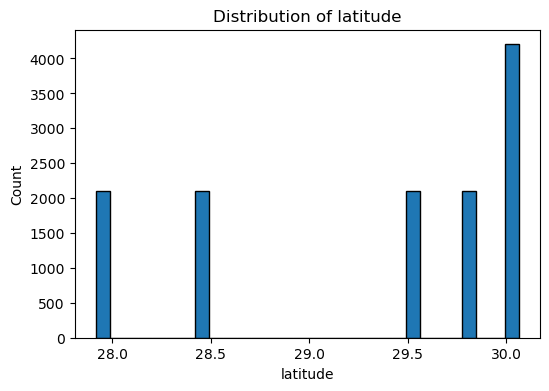

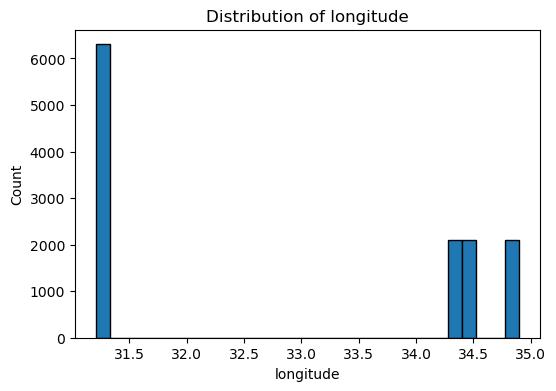

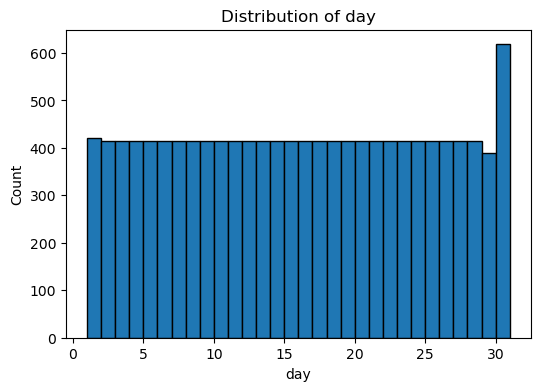

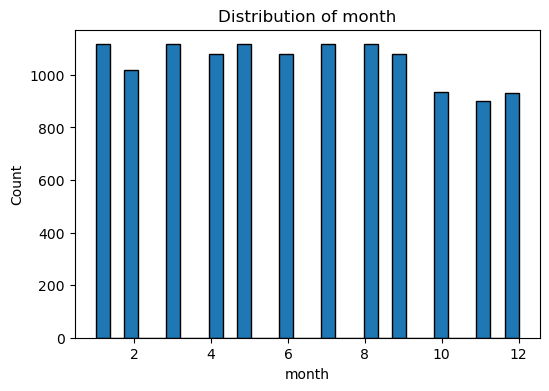

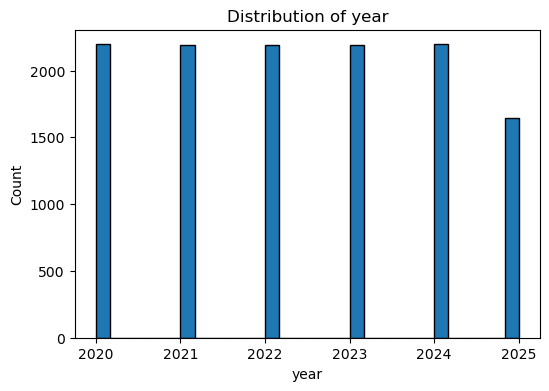

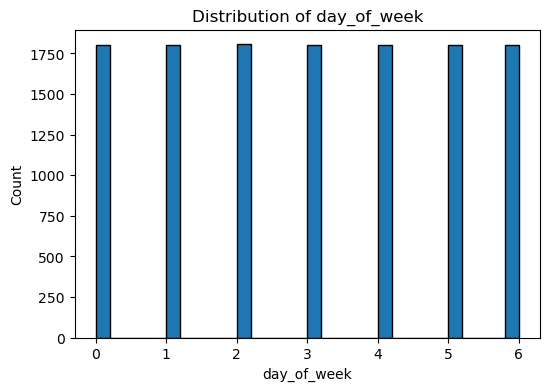

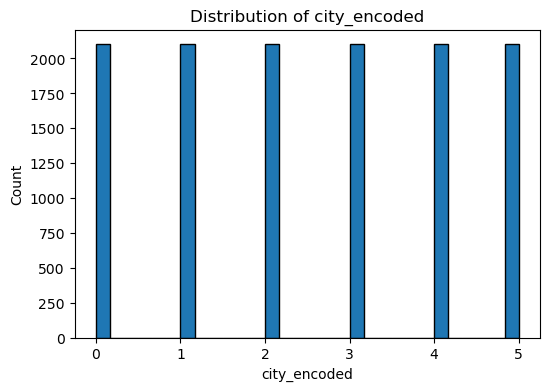

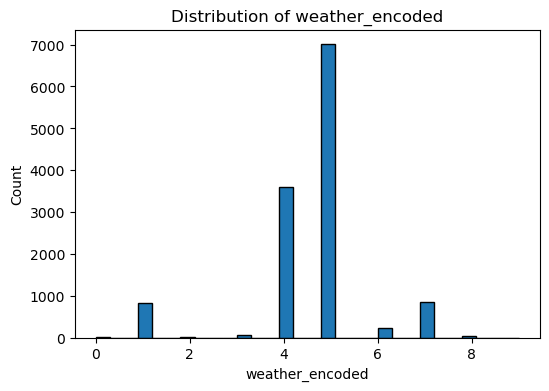

In [40]:

for col in df.columns:
    if df[col].dtype != 'category' and df[col].dtype != 'object':
        plt.figure(figsize=(6,4))
        plt.hist(df[col].dropna(), bins=30, edgecolor="black")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()

In [44]:
df['time']=pd.to_datetime(df['time'],errors='coerce')
df.dtypes

time                          datetime64[ns]
temperature_2m_max                   float64
temperature_2m_min                   float64
temperature_2m_mean                  float64
apparent_temperature_max             float64
apparent_temperature_min             float64
apparent_temperature_mean            float64
precipitation_sum                    float64
rain_sum                             float64
snowfall_sum                         float64
windspeed_10m_max                    float64
windspeed_10m_mean                   float64
windgusts_10m_max                    float64
relative_humidity_2m_max               int64
relative_humidity_2m_min               int64
relative_humidity_2m_mean              int64
shortwave_radiation_sum              float64
sunshine_duration                    float64
et0_fao_evapotranspiration           float64
city                                  object
latitude                             float64
longitude                            float64
weather   

In [45]:
corr=df.select_dtypes(include=[np.number]).corr()
corr

,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,windspeed_10m_max,...,sunshine_duration,et0_fao_evapotranspiration,latitude,longitude,day,month,year,day_of_week,city_encoded,weather_encoded
temperature_2m_max,1.000000,0.907844,0.976156,0.984049,0.924781,0.965197,-0.126489,-0.126489,NaN,0.245215,...,0.723543,0.860600,-7.549662e-02,9.945785e-02,-3.567768e-03,3.145688e-01,7.747729e-02,-2.397915e-03,8.442508e-02,0.226392
temperature_2m_min,0.907844,1.000000,0.972874,0.908242,0.959094,0.952527,-0.087053,-0.087053,NaN,0.297012,...,0.617799,0.828453,-3.374908e-01,3.415236e-01,-4.664913e-03,3.701872e-01,3.296838e-02,-3.961557e-03,8.852426e-02,0.141976
temperature_2m_mean,0.976156,0.972874,1.000000,0.969991,0.960310,0.983247,-0.112471,-0.112471,NaN,0.264953,...,0.698144,0.866739,-2.242925e-01,2.241010e-01,-5.148560e-03,3.409574e-01,5.889038e-02,-5.278416e-03,8.286781e-02,0.196565
apparent_temperature_max,0.984049,0.908242,0.969991,1.000000,0.949144,0.984390,-0.111339,-0.111339,NaN,0.163247,...,0.713768,0.800381,-8.396516e-02,6.776564e-02,-6.799385e-03,3.484494e-01,6.913345e-02,-5.222557e-03,6.645679e-02,0.207959
apparent_temperature_min,0.924781,0.959094,0.960310,0.949144,1.000000,0.984644,-0.089060,-0.089060,NaN,0.200347,...,0.631531,0.753084,-1.680346e-01,1.546447e-01,-5.025290e-03,4.301504e-01,4.544413e-02,-3.177454e-03,4.155677e-02,0.145808
apparent_temperature_mean,0.965197,0.952527,0.983247,0.984390,0.984644,1.000000,-0.101647,-0.101647,NaN,0.172372,...,0.679447,0.787693,-1.657994e-01,1.411321e-01,-7.379102e-03,3.924861e-01,5.987158e-02,-7.057697e-03,5.964081e-02,0.181053
precipitation_sum,-0.126489,-0.087053,-0.112471,-0.111339,-0.089060,-0.101647,1.000000,1.000000,NaN,0.046826,...,-0.200747,-0.135707,1.790842e-02,-3.110764e-03,2.639207e-03,-5.119699e-02,-3.811036e-02,1.103157e-02,3.532348e-03,-0.140778
rain_sum,-0.126489,-0.087053,-0.112471,-0.111339,-0.089060,-0.101647,1.000000,1.000000,NaN,0.046826,...,-0.200747,-0.135707,1.790842e-02,-3.110764e-03,2.639207e-03,-5.119699e-02,-3.811036e-02,1.103157e-02,3.532348e-03,-0.140778
snowfall_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
windspeed_10m_max,0.245215,0.297012,0.264953,0.163247,0.200347,0.172372,0.046826,0.046826,NaN,1.000000,...,0.256698,0.533406,-6.907035e-02,2.583478e-01,4.443405e-02,-3.963712e-02,-1.350318e-01,1.029301e-02,1.186358e-02,0.113782


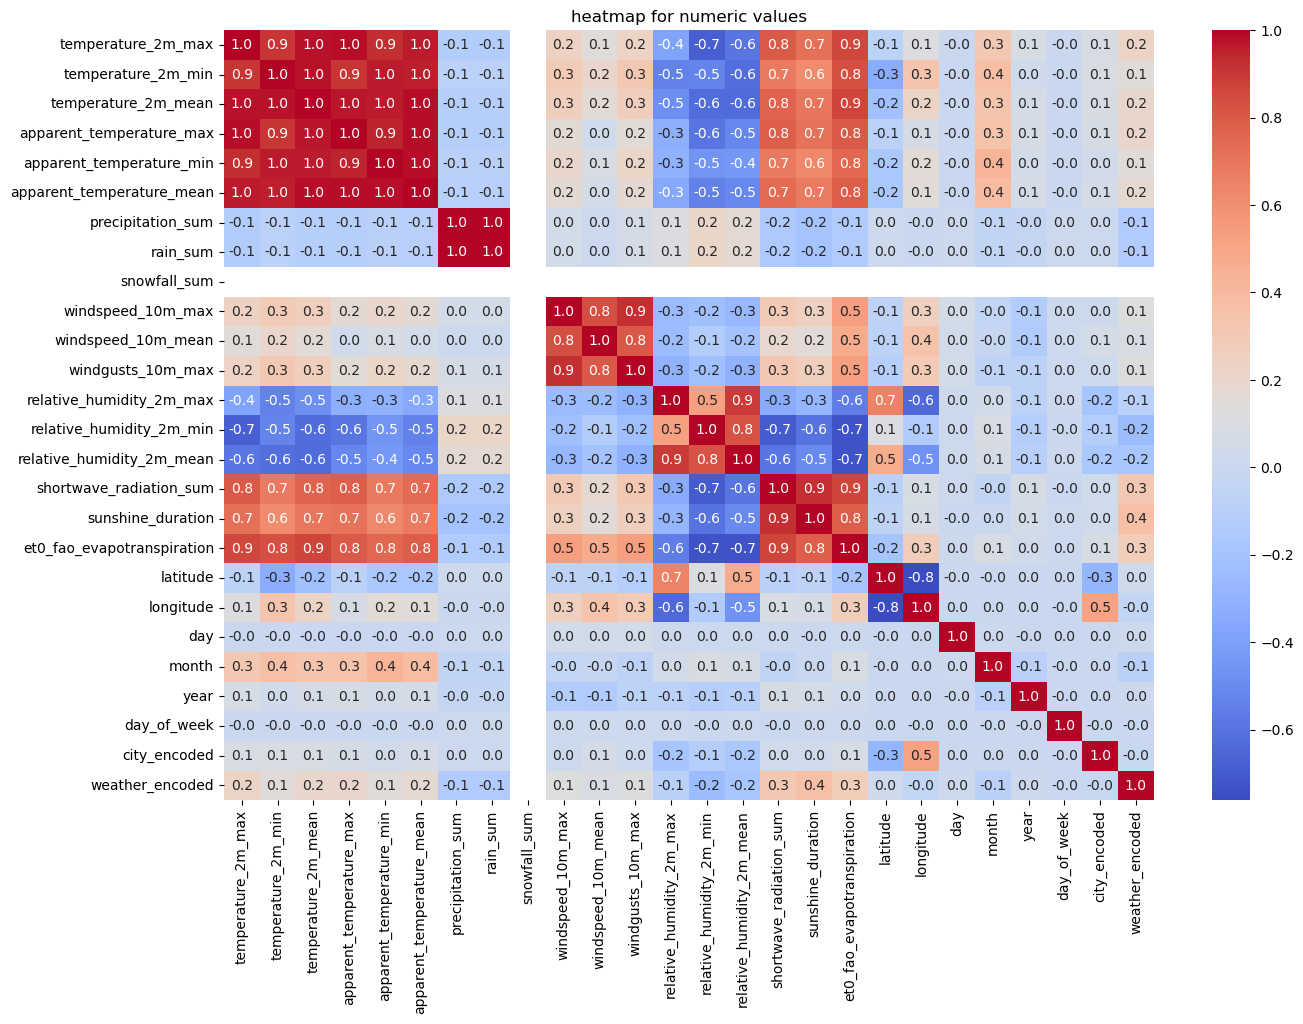

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.1f')
plt.title('heatmap for numeric values')
plt.show()

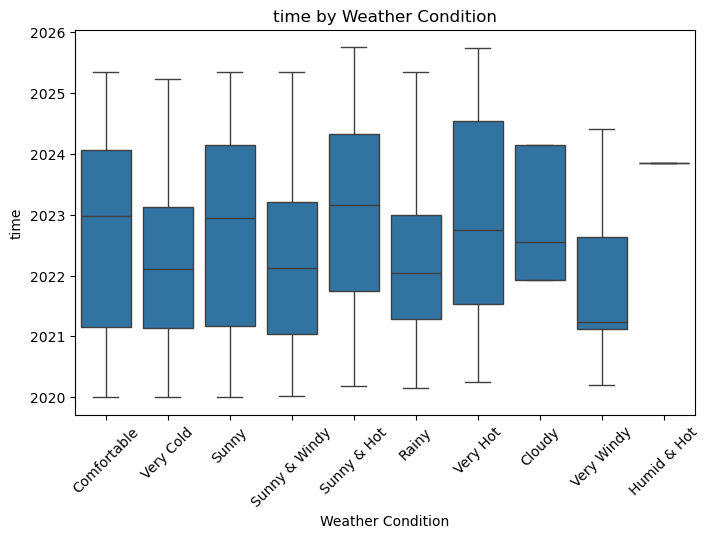

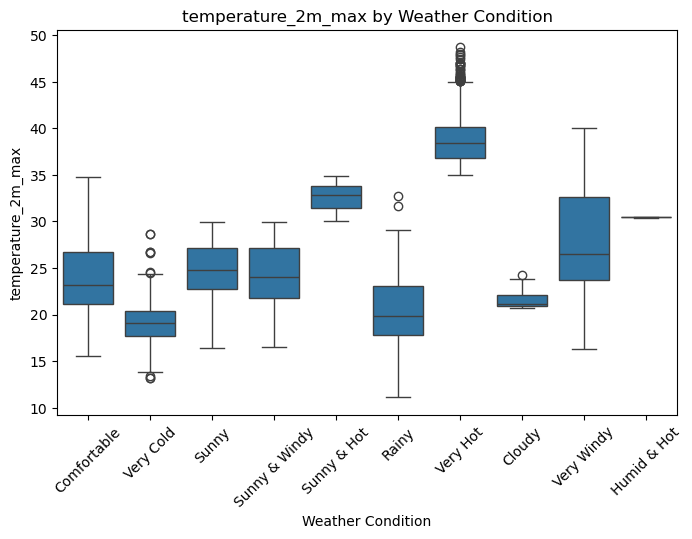

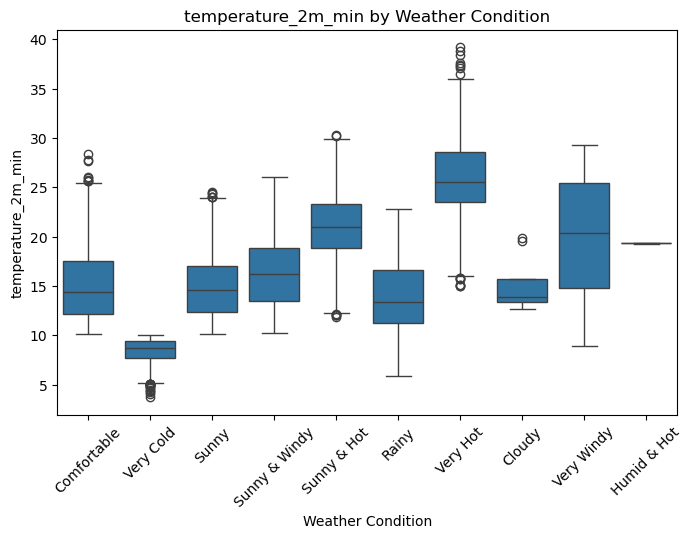

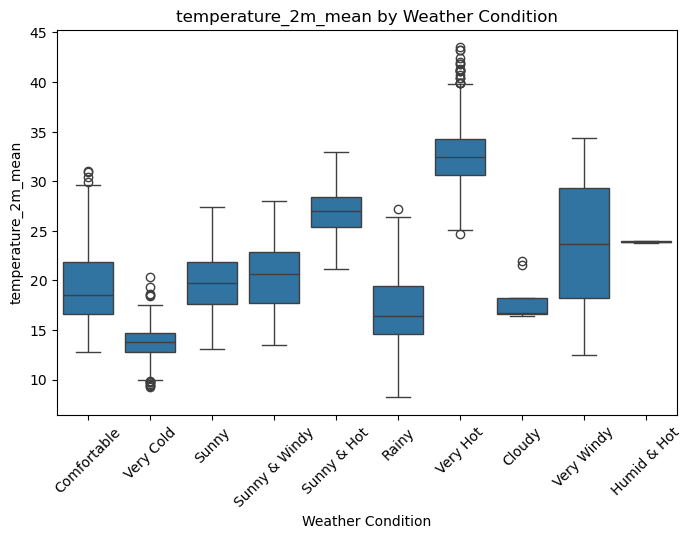

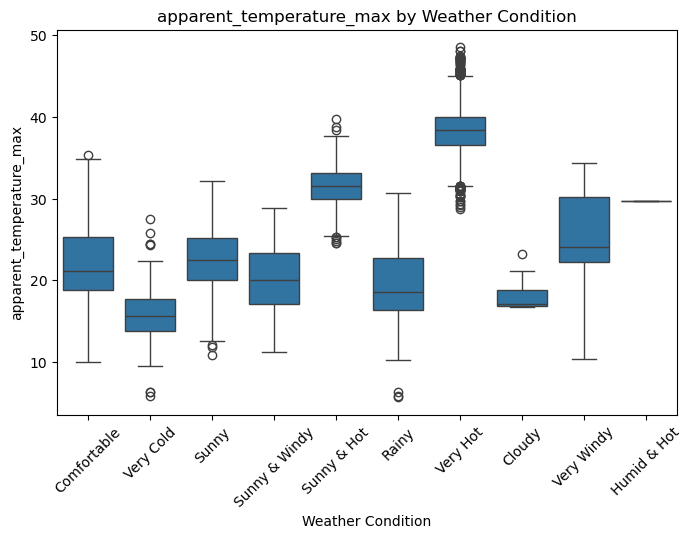

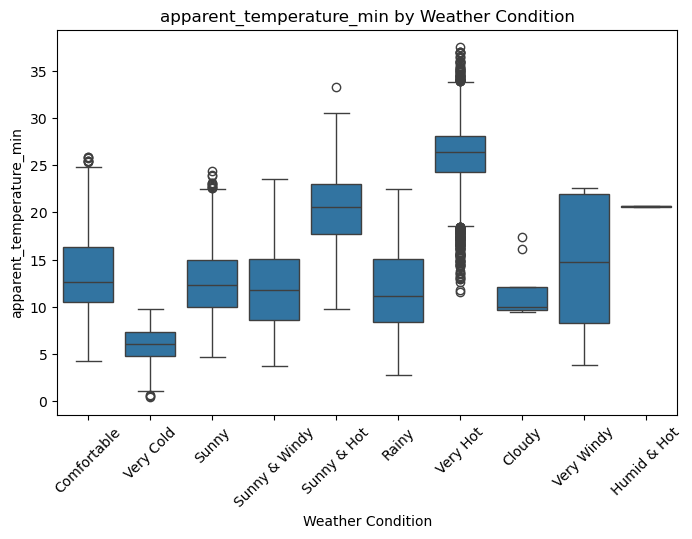

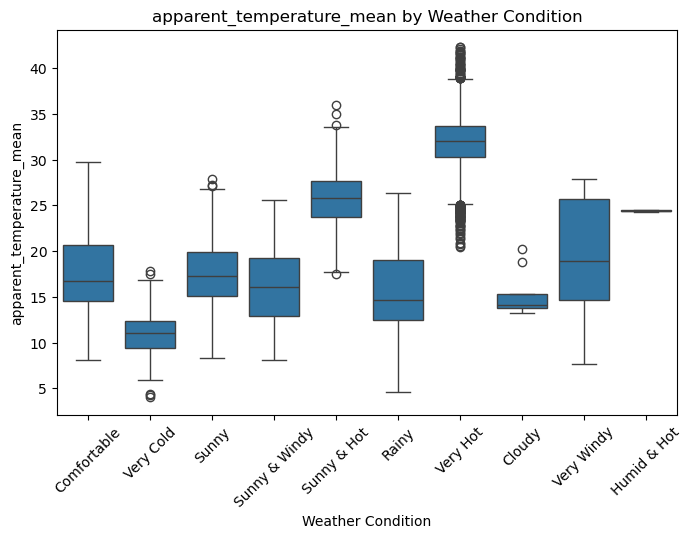

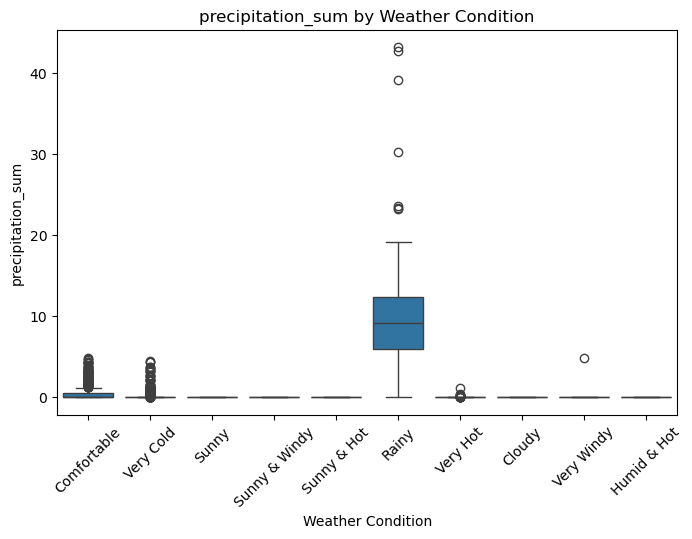

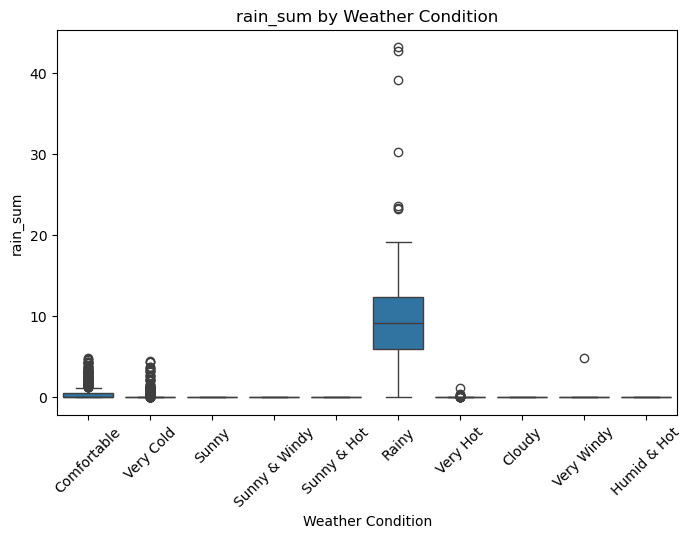

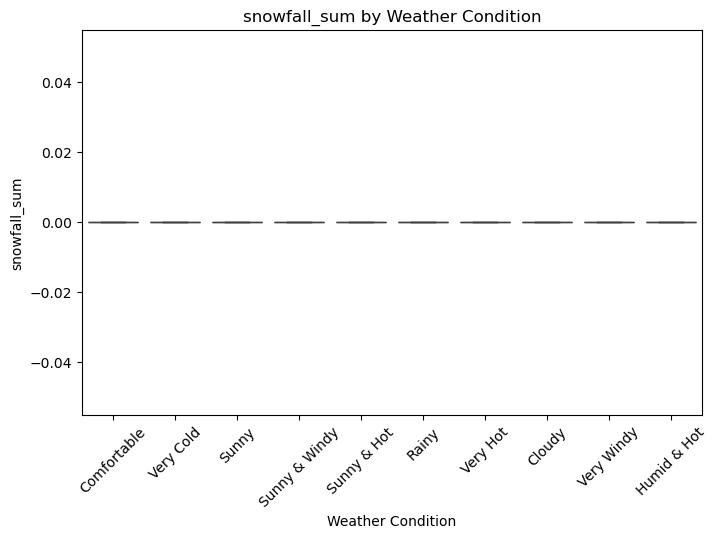

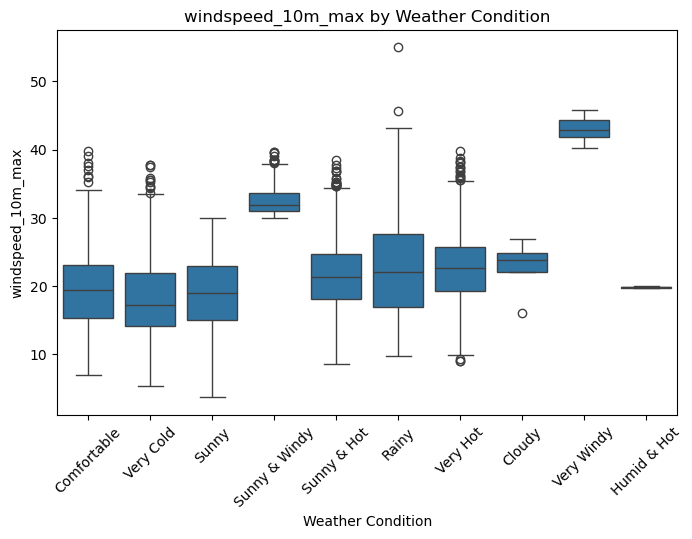

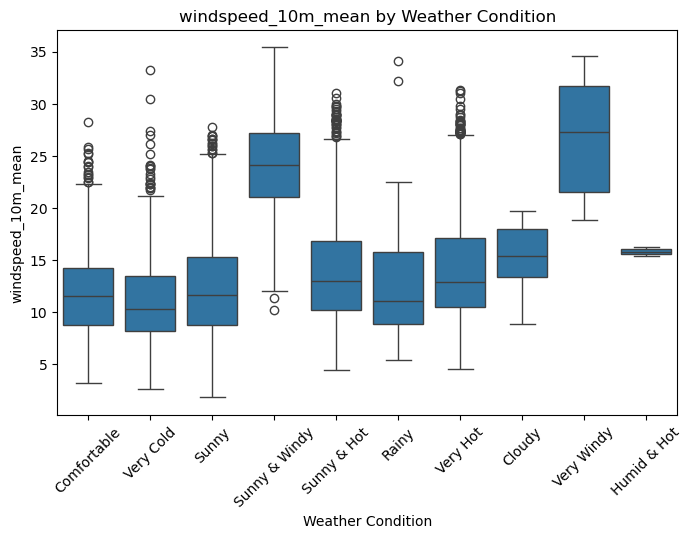

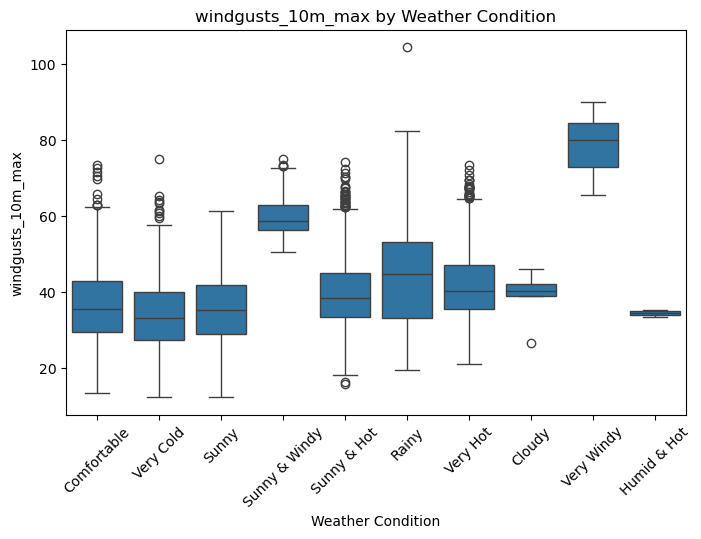

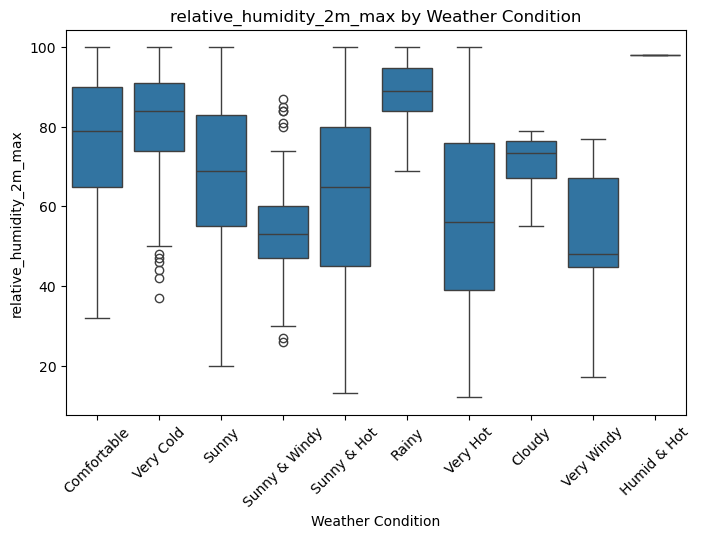

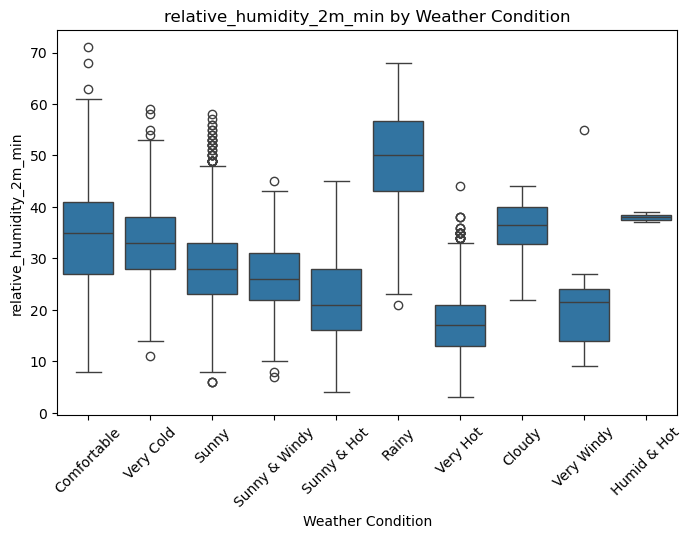

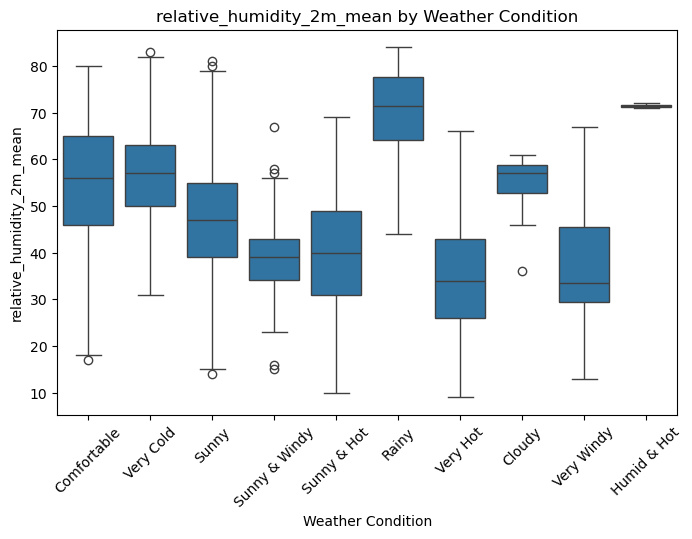

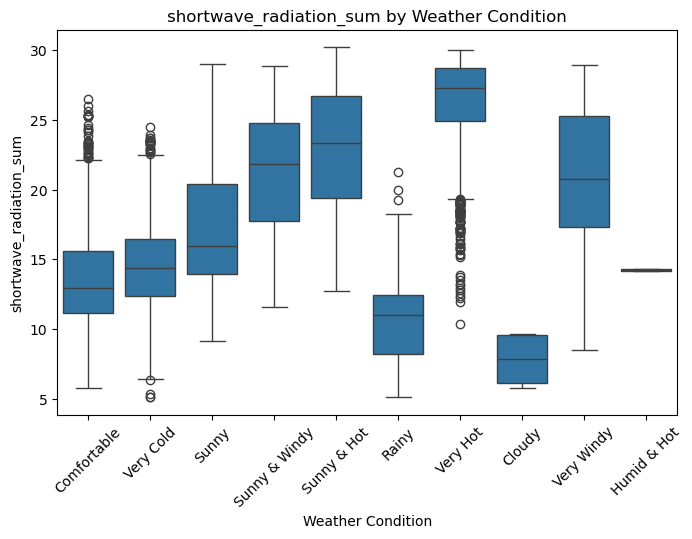

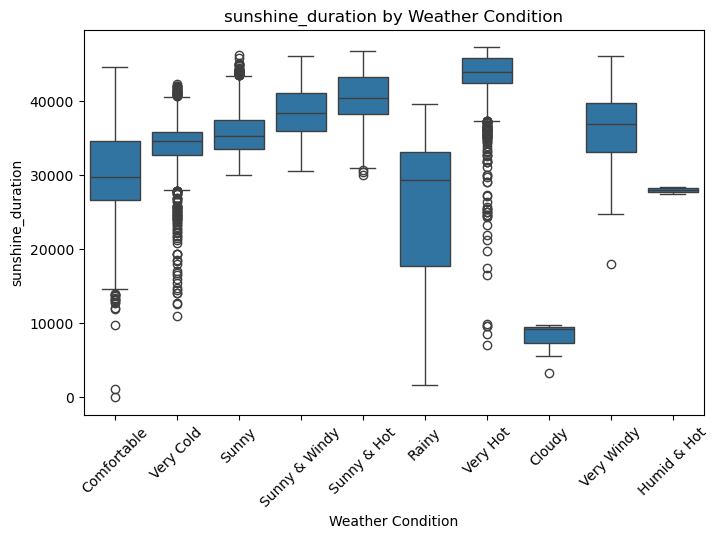

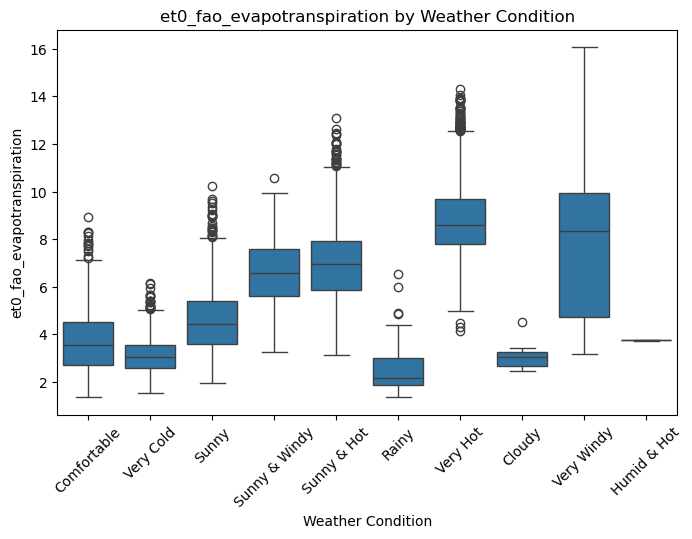

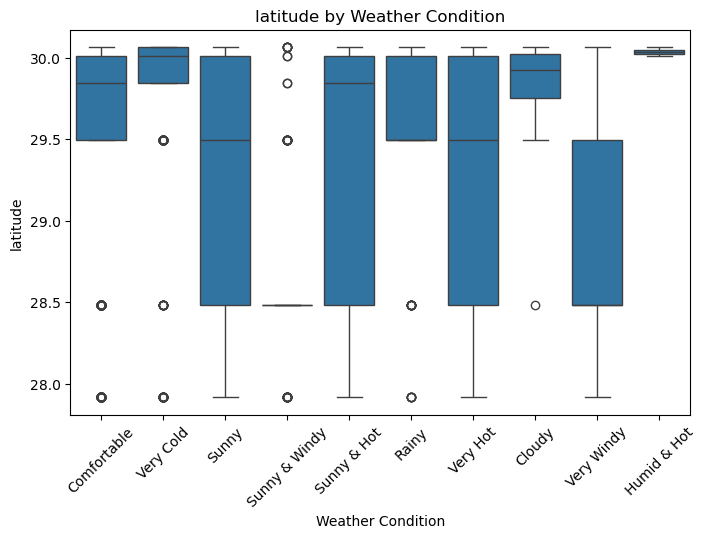

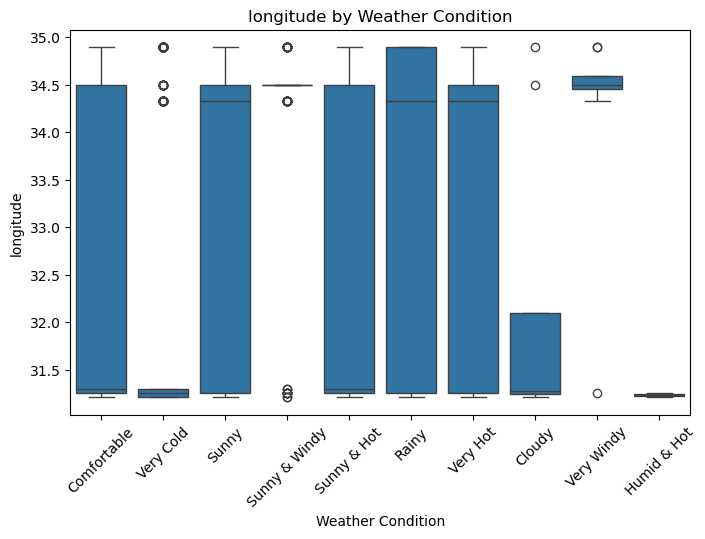

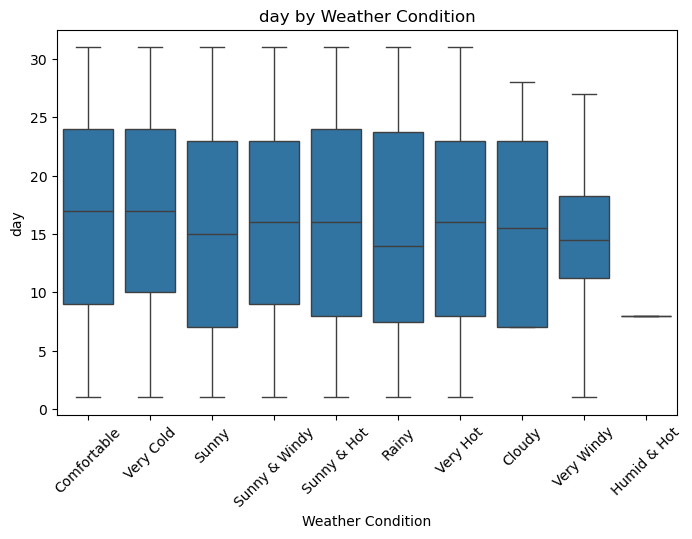

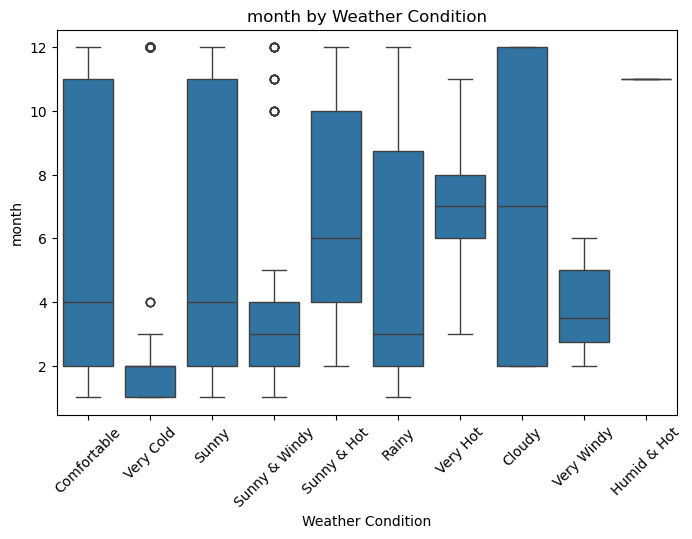

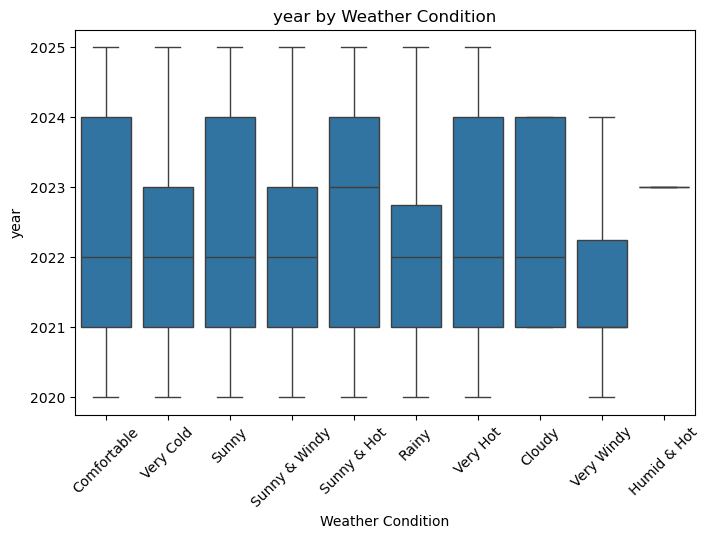

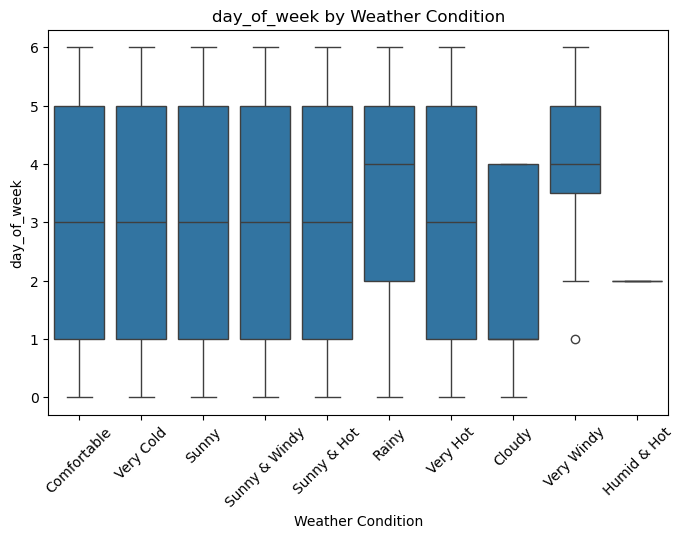

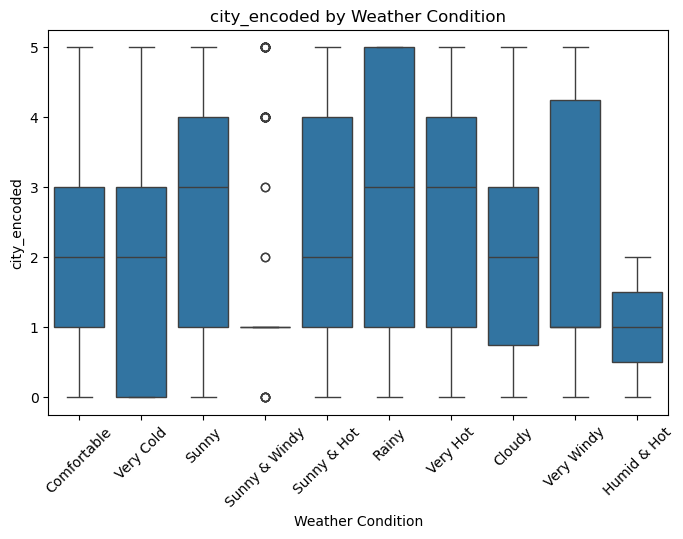

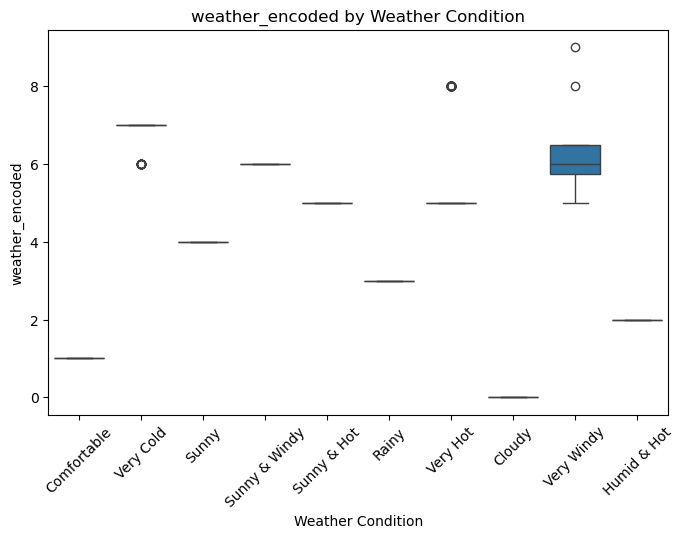

In [47]:
for col in df.columns:
    if df[col].dtype != 'object' and col != 'weather':
        plt.figure(figsize=(8,5))
        sns.boxplot(x="weather", y=col, data=df)
        plt.title(f"{col} by Weather Condition")
        plt.xlabel("Weather Condition")
        plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.show()

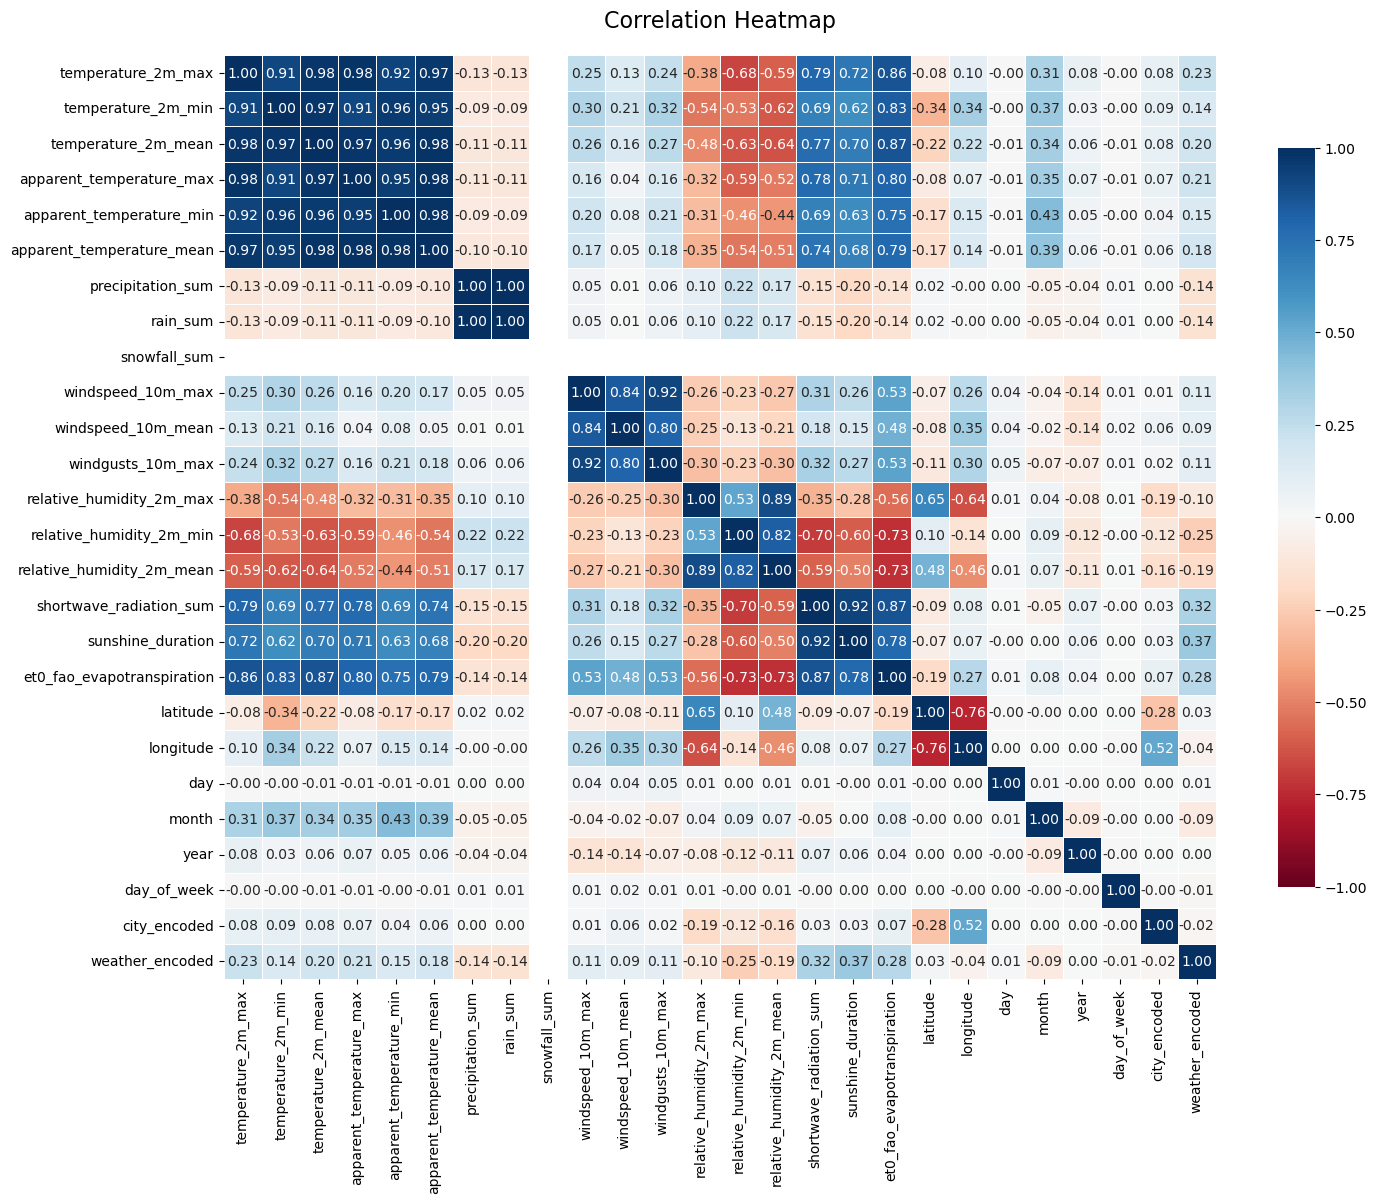

In [48]:
x = df.drop(columns=['time', 'weather','city'])

# correlation matrix
corr_matrix = x.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix, 
    annot=True,         
    fmt=".2f",           
    cmap="RdBu",      
    center=0,           
    vmin=-1, vmax=1,    
    linewidths=0.5, 
    cbar_kws={'shrink': 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, pad=20)
plt.show()

In [49]:
df["day"] = df["time"].dt.day
df["month"] = df["time"].dt.month
df["year"] = df["time"].dt.year
df["day_of_week"] = df["time"].dt.dayofweek
df.head(1)

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,...,city,latitude,longitude,weather,day,month,year,day_of_week,city_encoded,weather_encoded
0,2020-01-01,18.5,10.4,14.0,16.4,9.9,12.5,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Comfortable,1,1,2020,2,0,1


In [50]:
city_encoder = LabelEncoder()
df["city_encoded"] = city_encoder.fit_transform(df["city"])
df

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,...,city,latitude,longitude,weather,day,month,year,day_of_week,city_encoded,weather_encoded
0,2020-01-01,18.5,10.4,14.0,16.4,9.9,12.5,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Comfortable,1,1,2020,2,0,1
1,2020-01-02,17.1,7.7,12.5,11.9,4.2,9.1,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,2,1,2020,3,0,7
2,2020-01-03,16.0,7.4,11.8,9.5,4.0,7.2,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,3,1,2020,4,0,7
3,2020-01-04,16.7,9.5,12.6,12.8,6.4,8.9,0.1,0.1,0.0,...,Cairo,30.06263,31.24967,Very Cold,4,1,2020,5,0,7
4,2020-01-05,17.4,7.0,12.1,13.0,3.0,8.1,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,5,1,2020,6,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,2025-09-27,36.8,24.4,30.4,35.7,25.1,29.4,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,27,9,2025,5,5,5
12602,2025-09-28,39.1,25.8,32.2,38.1,24.6,30.6,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,28,9,2025,6,5,5
12603,2025-09-29,36.5,23.7,29.8,35.7,26.0,30.5,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,29,9,2025,0,5,5
12604,2025-09-30,35.1,22.7,28.9,33.0,23.2,28.1,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,30,9,2025,1,5,5


In [51]:
target_encoder = LabelEncoder()
df["weather_encoded"] = target_encoder.fit_transform(df["weather"])
df

,time,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,snowfall_sum,...,city,latitude,longitude,weather,day,month,year,day_of_week,city_encoded,weather_encoded
0,2020-01-01,18.5,10.4,14.0,16.4,9.9,12.5,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Comfortable,1,1,2020,2,0,1
1,2020-01-02,17.1,7.7,12.5,11.9,4.2,9.1,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,2,1,2020,3,0,7
2,2020-01-03,16.0,7.4,11.8,9.5,4.0,7.2,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,3,1,2020,4,0,7
3,2020-01-04,16.7,9.5,12.6,12.8,6.4,8.9,0.1,0.1,0.0,...,Cairo,30.06263,31.24967,Very Cold,4,1,2020,5,0,7
4,2020-01-05,17.4,7.0,12.1,13.0,3.0,8.1,0.0,0.0,0.0,...,Cairo,30.06263,31.24967,Very Cold,5,1,2020,6,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12601,2025-09-27,36.8,24.4,30.4,35.7,25.1,29.4,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,27,9,2025,5,5,8
12602,2025-09-28,39.1,25.8,32.2,38.1,24.6,30.6,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,28,9,2025,6,5,8
12603,2025-09-29,36.5,23.7,29.8,35.7,26.0,30.5,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,29,9,2025,0,5,8
12604,2025-09-30,35.1,22.7,28.9,33.0,23.2,28.1,0.0,0.0,0.0,...,Taba,29.49199,34.89572,Very Hot,30,9,2025,1,5,8


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12606 entries, 0 to 12605
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   time                        12606 non-null  datetime64[ns]
 1   temperature_2m_max          12606 non-null  float64       
 2   temperature_2m_min          12606 non-null  float64       
 3   temperature_2m_mean         12606 non-null  float64       
 4   apparent_temperature_max    12606 non-null  float64       
 5   apparent_temperature_min    12606 non-null  float64       
 6   apparent_temperature_mean   12606 non-null  float64       
 7   precipitation_sum           12606 non-null  float64       
 8   rain_sum                    12606 non-null  float64       
 9   snowfall_sum                12606 non-null  float64       
 10  windspeed_10m_max           12606 non-null  float64       
 11  windspeed_10m_mean          12606 non-null  float64   

In [57]:
X = df[["day", "month", "year", "day_of_week", 
          "city_encoded", "temperature_2m_mean","apparent_temperature_mean" ,"relative_humidity_2m_mean", "windspeed_10m_mean"]]
y = df["weather_encoded"]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#X_train=scaler.fit_transform(X_train)
#X_test=scaler.transform(X_test)
from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(max_iter=1000, class_weight="balanced")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [75]:
from sklearn.metrics import accuracy_score,r2_score, mean_absolute_error
y_pred = model.predict(X_test)
accuracy = mean_absolute_error(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 1.09


In [76]:
print(df["weather"].value_counts(normalize=True))


weather
Very Hot         0.384103
Sunny            0.284626
Sunny & Hot      0.175155
Very Cold        0.068380
Comfortable      0.065048
Sunny & Windy    0.016024
Rainy            0.005236
Cloudy           0.000635
Very Windy       0.000635
Humid & Hot      0.000159
Name: proportion, dtype: float64
